## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26436\2637987050.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

In [26]:
new_pumpkins.isnull().sum()

Month         0
DayOfYear     0
Variety       0
City          0
Package       0
Low Price     0
High Price    0
Price         0
dtype: int64

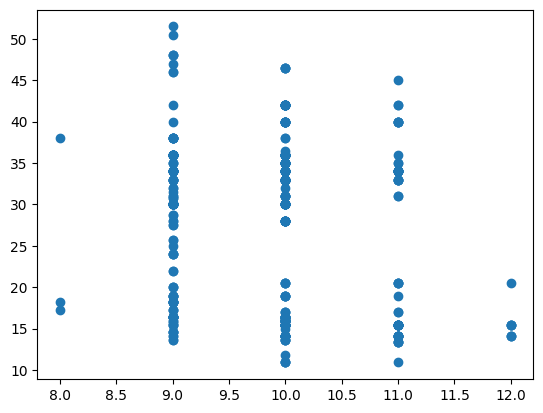

In [4]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

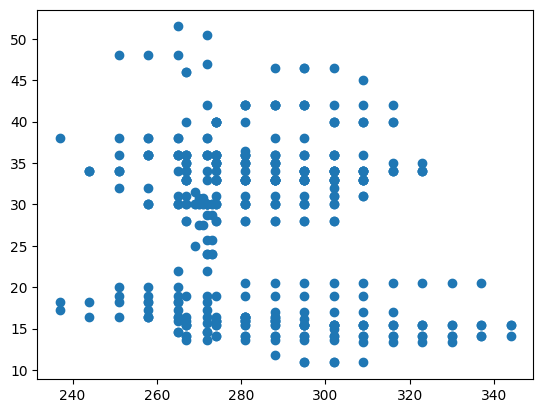

In [5]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

Package
1 1/9 bushel cartons    15.749806
1 1/9 bushel crates     14.893048
1/2 bushel cartons      34.452991
bushel baskets          46.450000
bushel cartons          23.675676
Name: Price, dtype: float64


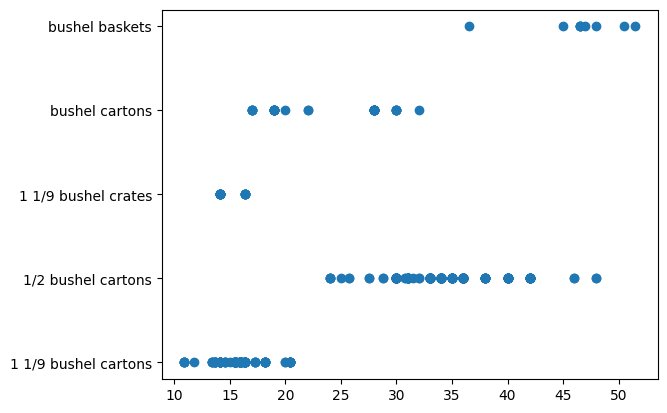

In [6]:
print(new_pumpkins.groupby('Package')['Price'].mean())
plt.scatter('Price', 'Package', data=new_pumpkins)

In [7]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


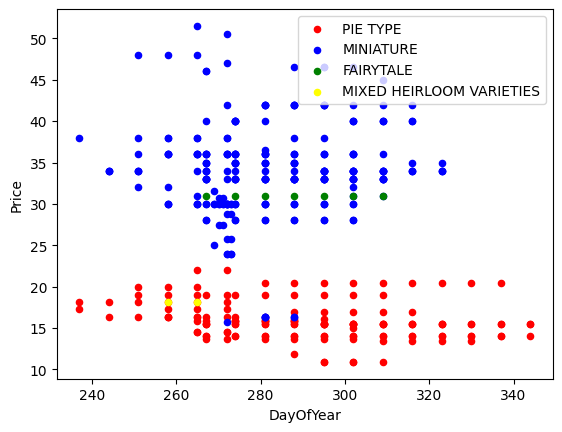

In [8]:
ax=None
colors=['red', 'blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax, c=colors[i], label=var)

<Axes: xlabel='Variety'>

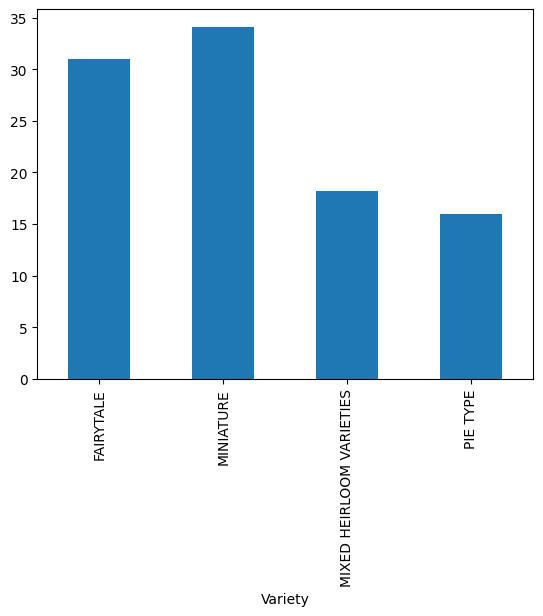

In [9]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='DayOfYear', ylabel='Price'>

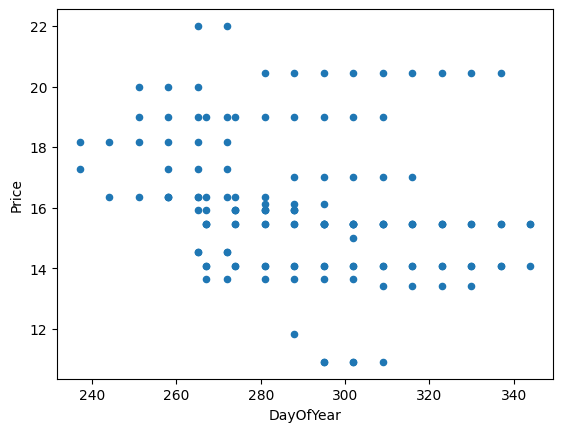

In [10]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear', 'Price')

In [11]:
print(pie_pumpkins['Month'].corr(pie_pumpkins['Price']))
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.23841413206125714
-0.2669192282197318


In [12]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\Asus\AppData\Local\Temp\ipykernel_26436\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


In [19]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.04460606335028361


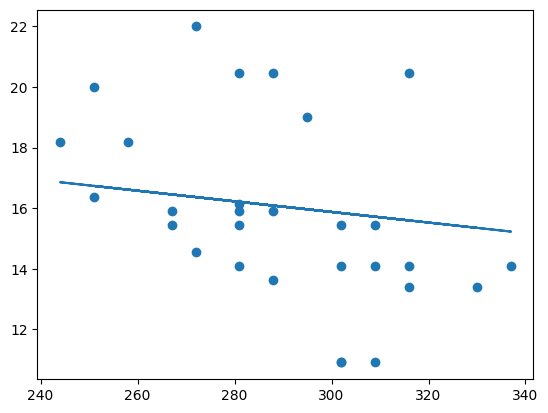

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

Mean error: 2.93 (18.3%)
Mean error: 2.92 (18.2%)
Mean error: 2.87 (17.9%)
Mean error: 2.87 (17.9%)
Mean error: 2.87 (17.9%)
Mean error: 2.86 (17.8%)
Mean error: 2.86 (17.8%)
Mean error: 2.86 (17.8%)
Mean error: 2.86 (17.8%)
Mean error: 2.86 (17.8%)
Mean error: 2.86 (17.8%)
Mean error: 2.87 (17.9%)
Mean error: 2.87 (17.9%)
Mean error: 2.87 (17.9%)
Mean error: 2.87 (17.9%)
Mean error: 2.88 (17.9%)
Mean error: 2.88 (17.9%)
Mean error: 2.88 (18.0%)
Mean error: 2.88 (17.9%)
Mean error: 2.88 (17.9%)


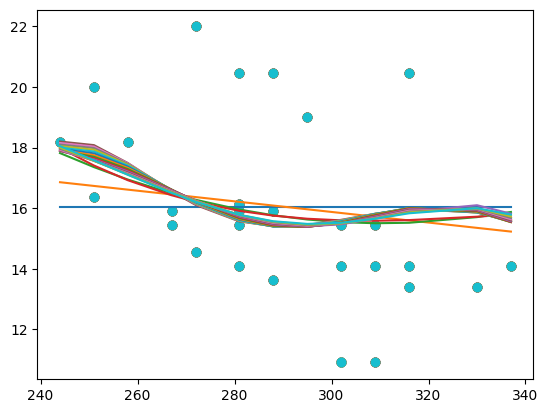

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for i in range(20):
    pipeline = make_pipeline(PolynomialFeatures(i), LinearRegression())
    pipeline.fit(X_train,y_train)
    pred = pipeline.predict(X_test)

    plt.scatter(X_test,y_test)
    plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

    pred = pipeline.predict(sorted(X_test))
    mse = np.sqrt(mean_squared_error(y_test, pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

In [22]:
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,False,False,False,True
71,False,False,False,True
72,False,False,False,True
73,False,False,False,True
74,False,False,False,True
...,...,...,...,...
1738,False,True,False,False
1739,False,True,False,False
1740,False,True,False,False
1741,False,True,False,False


In [23]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


In [39]:
X = pd.get_dummies(new_pumpkins['Variety']) \
    .join(new_pumpkins['Month']) \
    .join(pd.get_dummies(new_pumpkins['City'])) \
    .join(pd.get_dummies(new_pumpkins['Package'])) 
y = new_pumpkins['Price']

for i in range(20, 35):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=i/100, random_state=0)

#for i in range(5):
    pipeline = make_pipeline(PolynomialFeatures(5), LinearRegression())
    pipeline.fit(X_train,y_train)
    pred = pipeline.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = pipeline.score(X_train,y_train)
    print('Model determination: ', score)

Mean error: 3.54e+05 (-6.46e+02%)
Model determination:  0.9686130218342541
Mean error: 2.16 (8.09%)
Model determination:  0.9682588581833285
Mean error: 3.03e+06 (1.67e+03%)
Model determination:  0.9678881531738455
Mean error: 3.62e+07 (-5.68e+02%)
Model determination:  0.9669362975535996
Mean error: 2.54 (9.4%)
Model determination:  0.9673244277012545
Mean error: 1.87e+04 (6.49e+02%)
Model determination:  0.9671997011762581
Mean error: 1.02e+07 (-6.07e+02%)
Model determination:  0.9668134061508882
Mean error: 2.01e+07 (-2.29e+03%)
Model determination:  0.966699857148092
Mean error: 2.19 (8.11%)
Model determination:  0.9671150227299137
Mean error: 2.75e+06 (7.81e+02%)
Model determination:  0.9671276615686453
Mean error: 2.68e+07 (8e+02%)
Model determination:  0.9660633426393297
Mean error: 4.2e+07 (1.58e+03%)
Model determination:  0.966943973025185
Mean error: 1.35e+06 (1.19e+03%)
Model determination:  0.9667445671277686
Mean error: 1.44e+06 (2.21e+03%)
Model determination:  0.96691457